In [301]:
import pandas as pd
import numpy as numpy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.model_selection import KFold
plt.style.use('fivethirtyeight')


%matplotlib inline


In [302]:
df_Stock= pd.read_csv('../Data/MSFT_historical_data_yfinance.csv')
target= 'Close'
df_Stock['Date'] = pd.to_datetime(df_Stock['Date'])
df_Stock

,Open,High,Low,Close,Volume,Date
0,31.509763,31.535026,30.836118,30.895061,40066100,2013-12-13
1,30.928732,31.156088,30.768743,31.063461,31734200,2013-12-16
2,31.105562,31.248713,30.591910,30.751900,45687700,2013-12-17
3,30.617180,30.819271,29.918271,30.802433,63192100,2013-12-18
4,30.743483,30.777166,30.381401,30.524549,34160100,2013-12-19
...,...,...,...,...,...,...
2512,368.230011,371.450012,366.320007,370.950012,23118900,2023-12-07
2513,369.200012,374.459991,368.230011,374.230011,20144800,2023-12-08
2514,368.480011,371.600006,366.100006,371.299988,27708800,2023-12-11
2515,370.850006,374.420013,370.459991,374.380005,24793900,2023-12-12


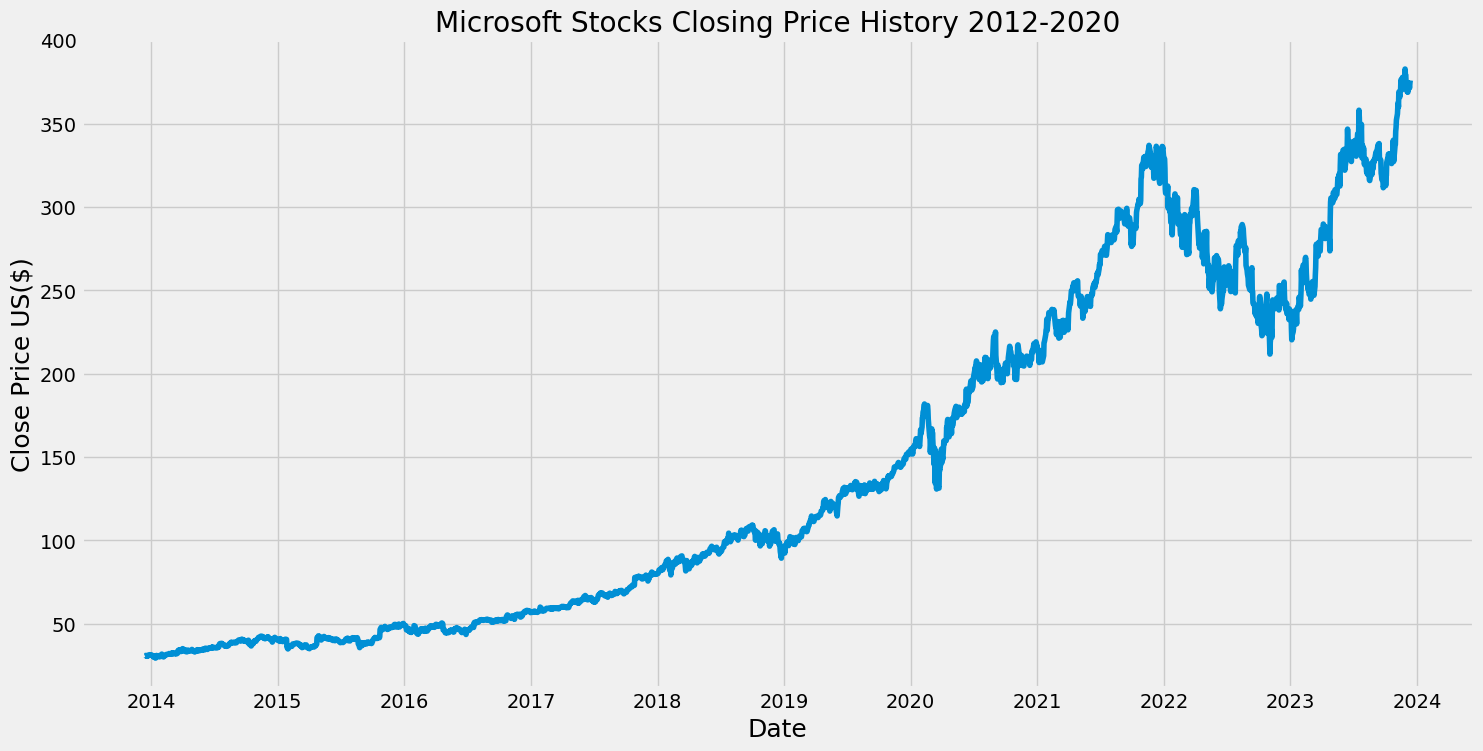

In [303]:
nflx_df=df_Stock[['Date','High','Open','Low','Close']]
nflx_df.head(10)
plt.figure(figsize=(16,8))
plt.title('Microsoft Stocks Closing Price History 2012-2020')
plt.plot(nflx_df['Date'],nflx_df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.show()

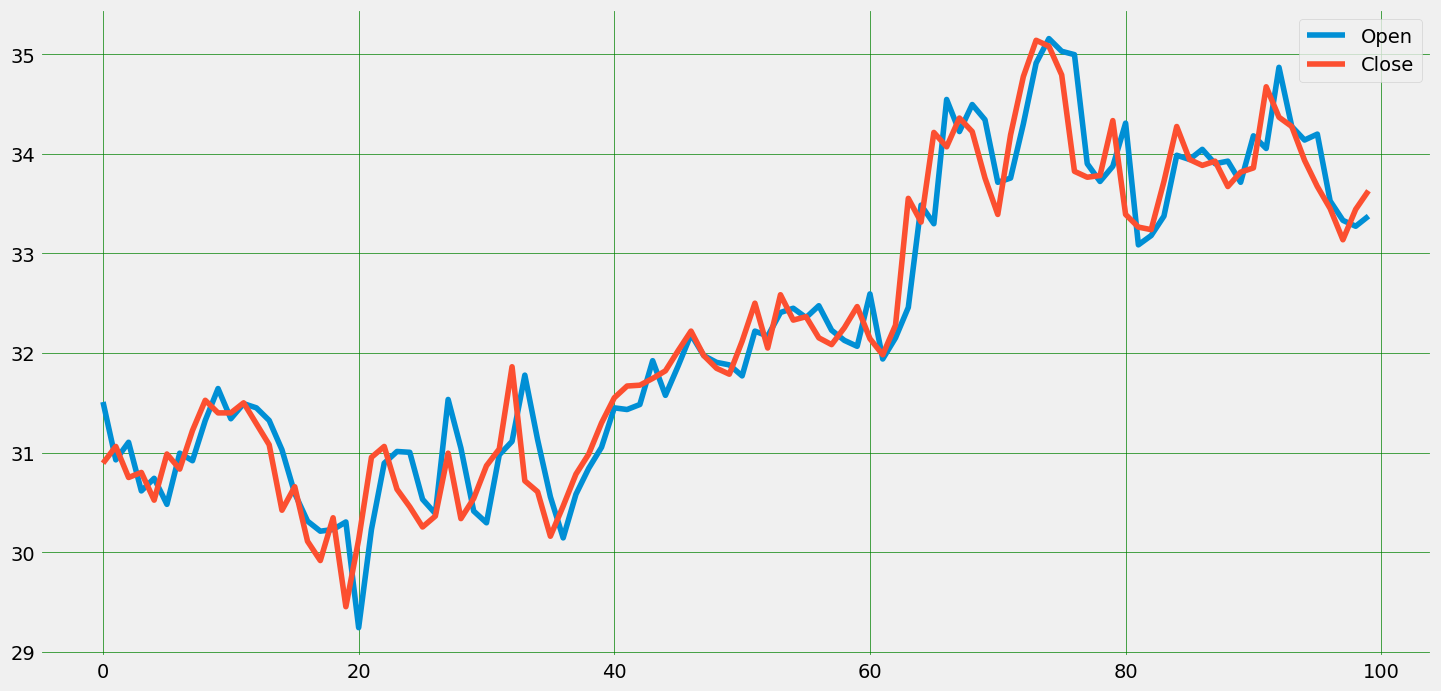

In [304]:
#Plot Open vs Close
nflx_df[['Open','Close']].head(100).plot(kind='line',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


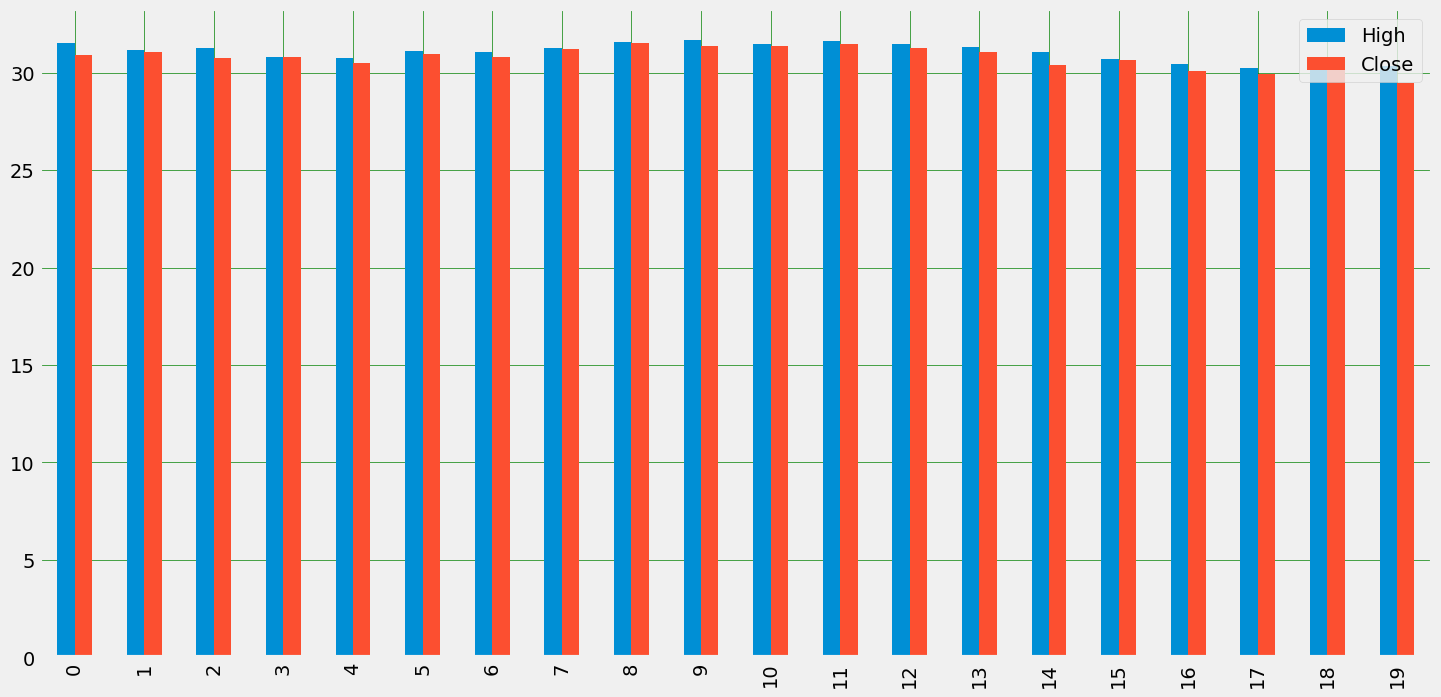

In [305]:
#Plot High vs Close
nflx_df[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


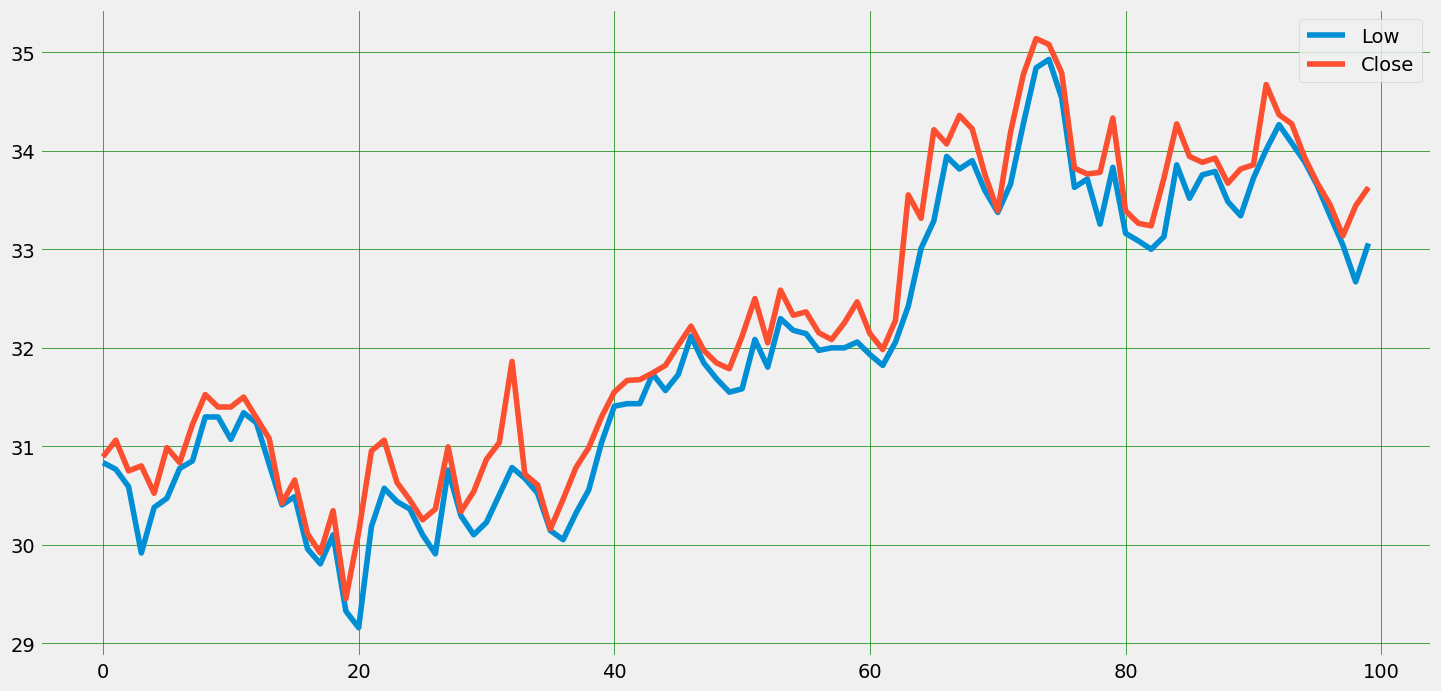

In [306]:
#Plot Low vs Close
nflx_df[['Low','Close']].head(100).plot(kind='line',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [307]:
#Date format is DateTime and it will throw error while training so I have created seperate month, year and date entities
nflx_df['Year']=df_Stock['Date'].dt.year
nflx_df['Month']=df_Stock['Date'].dt.month
nflx_df['Day']=df_Stock['Date'].dt.day

In [308]:
nfx_df=nflx_df[['Day','Month','Year','High','Open','Low','Close']]
nflx_df.head(10)

,Date,High,Open,Low,Close,Year,Month,Day
0,2013-12-13,31.535026,31.509763,30.836118,30.895061,2013,12,13
1,2013-12-16,31.156088,30.928732,30.768743,31.063461,2013,12,16
2,2013-12-17,31.248713,31.105562,30.591910,30.751900,2013,12,17
3,2013-12-18,30.819271,30.617180,29.918271,30.802433,2013,12,18
4,2013-12-19,30.777166,30.743483,30.381401,30.524549,2013,12,19
5,2013-12-20,31.097156,30.482455,30.474033,30.987688,2013,12,20
6,2013-12-23,31.063467,30.996104,30.777167,30.836111,2013,12,23
7,2013-12-24,31.299245,30.920322,30.852956,31.223463,2013,12,24
8,2013-12-26,31.568696,31.324499,31.299235,31.526590,2013,12,26
9,2013-12-27,31.678165,31.644485,31.299239,31.400288,2013,12,27


In [309]:
#separate Independent and dependent variable
X = nfx_df.iloc[:,nfx_df.columns !='Close']
Y= nfx_df.iloc[:, 5]
print(X.shape)  #output: (2093, 6)
print(Y.shape) #output: (2093,)

(2517, 6)
(2517,)


In [310]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=.2)
print(X_train.shape) #output: (1569, 6)
print(X_test.shape)  #output: (524, 6)  
print(Y_train.shape) #output: (1569,)
print(Y_test.shape)  #output: (524,)
#y_test to be evaluated with y_pred for Diff models

(2013, 6)
(504, 6)
(2013,)
(504,)


In [311]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(X_train,Y_train)


In [312]:
Y_test_pred = knn_model.predict(X_test)

In [313]:
knn_kfold = model_selection.KFold(n_splits=20, random_state=100,shuffle=True)
results_kfold = model_selection.cross_val_score(knn_model, X_test, Y_test.astype('int'), cv=knn_kfold)
print('Accuracy: ', results_kfold.mean()*100)

Accuracy:  99.9596692215782


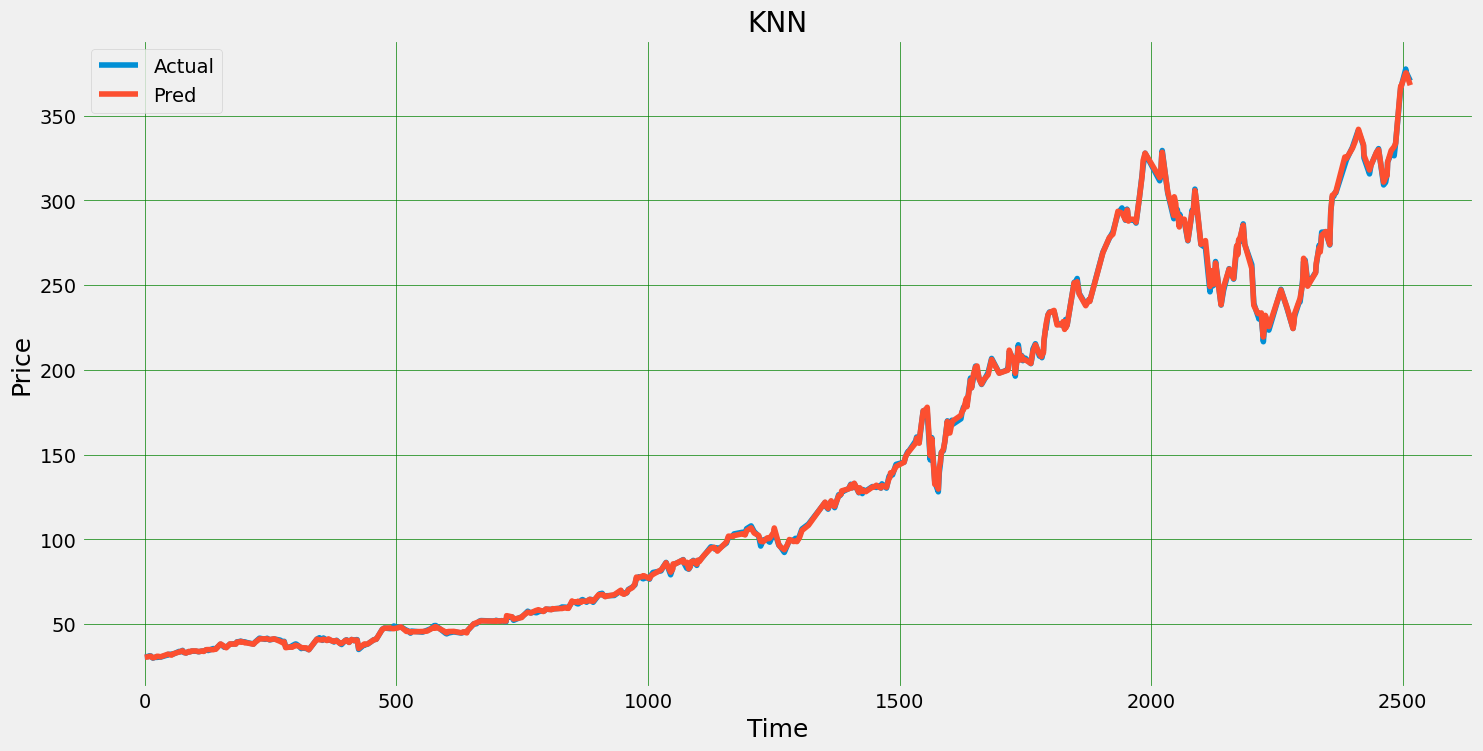

In [318]:
plot_knn_df  = pd.DataFrame({'Actual':Y_test,'Pred':Y_test_pred})
plot_knn_df_sorted = plot_knn_df.sort_index()
plot_knn_df_sorted.plot(kind='line', figsize=(16, 8))  # Use 'line' instead of 'bar'
plt.title('KNN')
plt.ylabel('Price', fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()